<a href="https://colab.research.google.com/github/erimoreno/08MBID-Visualizacion-de-Datos/blob/main/AG4_TrabajoPractico_VisualizacionDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTovIshIvqyQwxj-v2l_s4mSH-7CmFVkRzUIOSruQLRnf9XFrDVK3AvXWLhMp3bepRVPbCNzXoktbDF/pub?gid=673520592&single=true&output=csv")

data = data.query('STATE_NAME != "Puerto Rico" and STATE_NAME != "Country Of Mexico" and YEAR_CAL <2022')
print(data.shape)
data.rename(columns={'STATE_NAME': 'state_name'}, inplace=True)
data.head()


(22344, 7)


,SAMPLE_DURATION,YEAR_LOCAL,YEAR_CAL,state_name,CLASIFICACION,AQI,CNT
0,8-HR RUN AVG END HOUR,199001,1990,Alaska,Insalubre para grupos sensibles,118,12
1,8-HR RUN AVG END HOUR,199003,1990,Alaska,Bueno,27,199
2,8-HR RUN AVG END HOUR,199012,1990,Alaska,Insalubre para grupos sensibles,118,2
3,8-HR RUN AVG END HOUR,199003,1990,Alaska,Insalubre para grupos sensibles,113,1
4,8-HR RUN AVG END HOUR,199001,1990,Arizona,Bueno,31,358


In [ ]:
population_us_2021 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTovIshIvqyQwxj-v2l_s4mSH-7CmFVkRzUIOSruQLRnf9XFrDVK3AvXWLhMp3bepRVPbCNzXoktbDF/pub?gid=343001163&single=true&output=csv")
print(population_us_2021.shape)
population_us_2021.head()

(50, 3)


,state_fips_code,state_name,poblacion_estimada
0,1,Alabama,898773
1,2,Alaska,288121
2,4,Arizona,4228870
3,5,Arkansas,201998
4,6,California,17783700


In [ ]:
data['YEAR_LOCAL'] = data['YEAR_LOCAL'].astype(str)
data['YEAR_MONTH'] = data['YEAR_LOCAL'].str[:4] + '-' + data['YEAR_LOCAL'].str[4:]

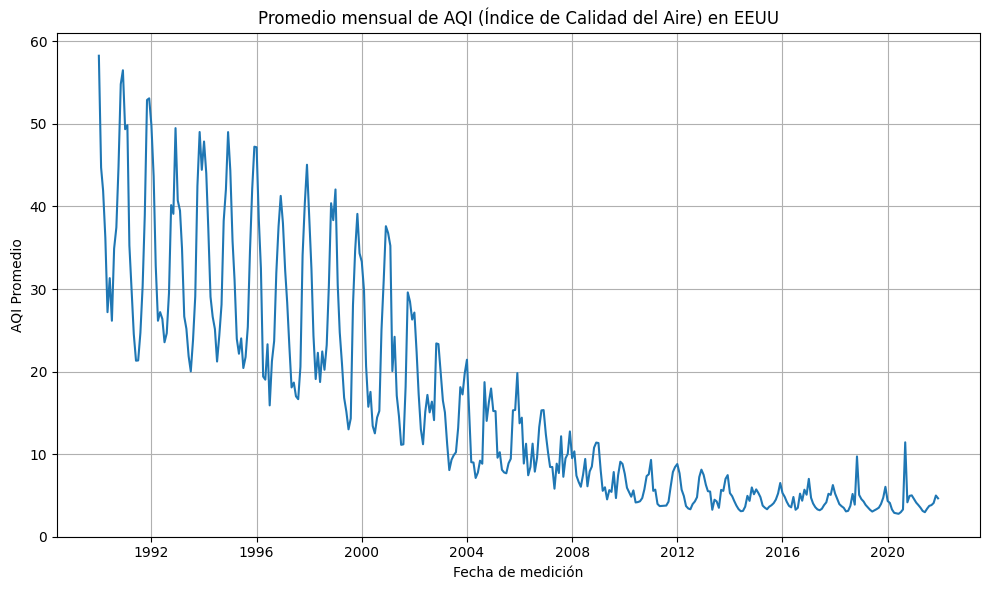

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = data.groupby('YEAR_MONTH')['AQI'].mean().reset_index()
grouped['YEAR_MONTH'] = pd.to_datetime(grouped['YEAR_MONTH'])

plt.figure(figsize=(10, 6))
plt.plot(grouped['YEAR_MONTH'], grouped['AQI'], linestyle='-')
plt.title('Promedio mensual de AQI (Índice de Calidad del Aire) en EEUU')
plt.xlabel('Fecha de medición')
plt.ylabel('AQI Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

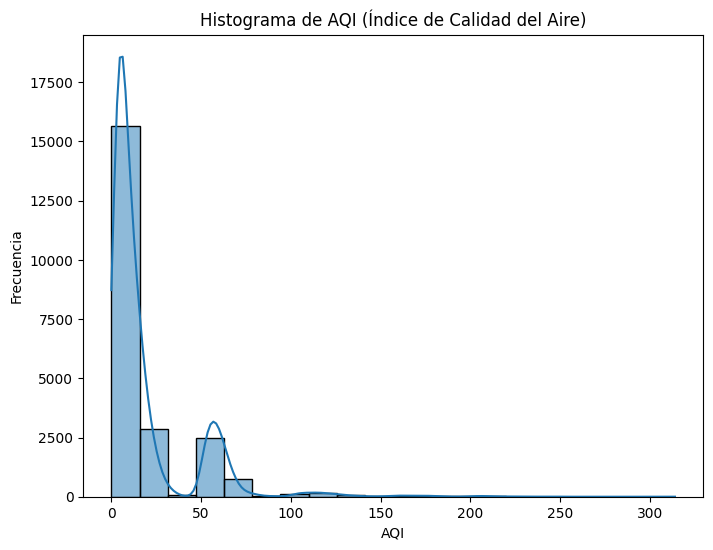

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['AQI'], bins=20, kde=True)
plt.title('Histograma de AQI (Índice de Calidad del Aire)')
plt.xlabel('AQI')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


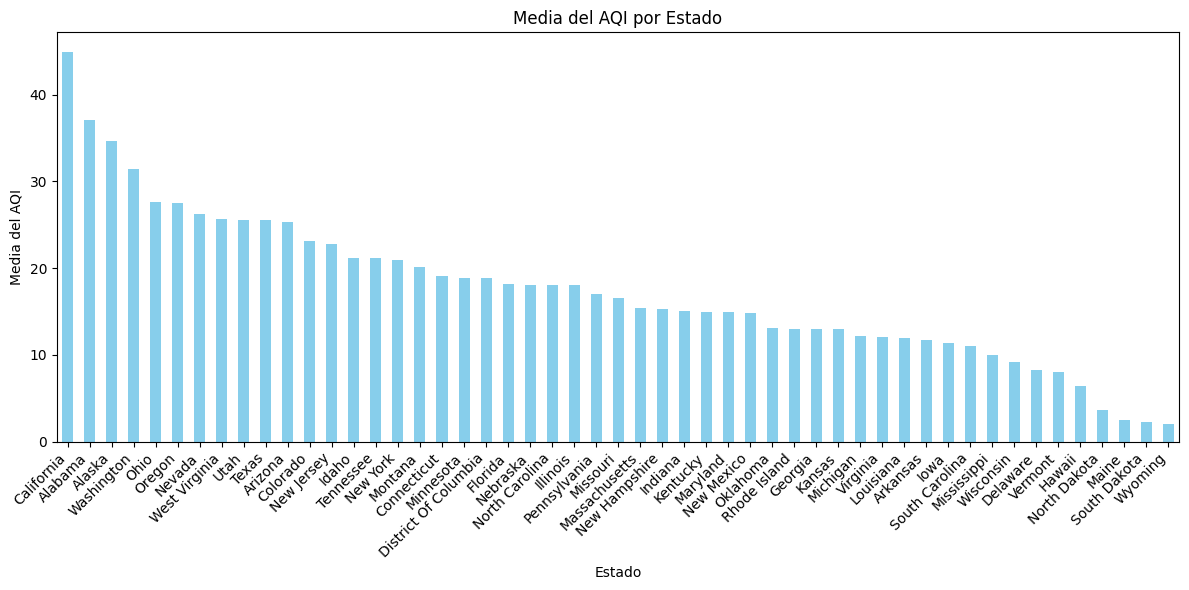

In [ ]:
import matplotlib.pyplot as plt

# Calcular la media del AQI por estado
mean_aqi_by_state = data.groupby('state_name')['AQI'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
mean_aqi_by_state.plot(kind='bar', color='skyblue')
plt.title('Media del AQI por Estado')
plt.xlabel('Estado')
plt.ylabel('Media del AQI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
merged_data = pd.merge(mean_aqi_by_state, population_us_2021[["state_name","poblacion_estimada"]], on='state_name', how='inner')

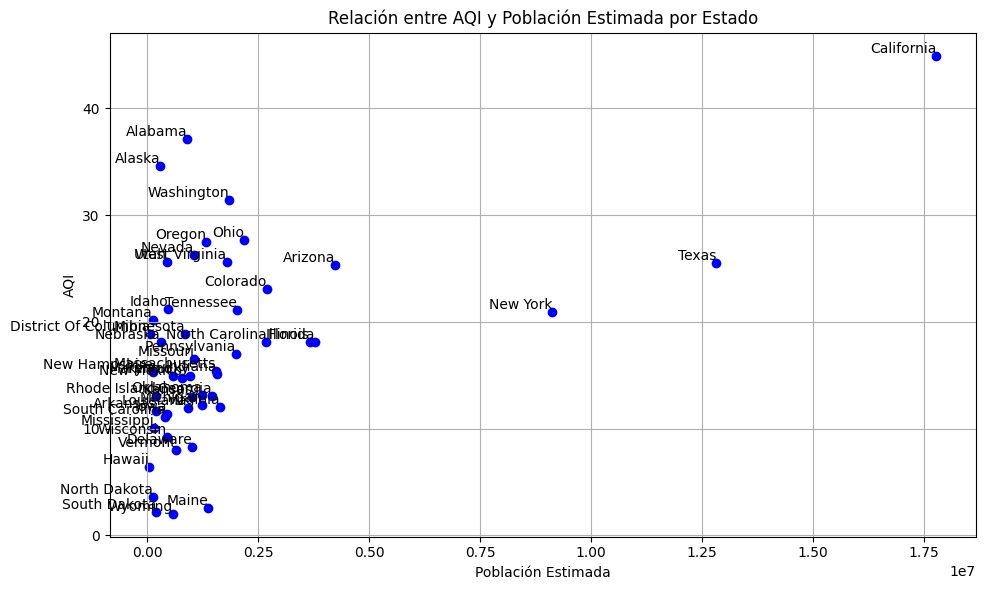

In [199]:

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['poblacion_estimada'], merged_data['AQI'], color='blue')

plt.title('Relación entre AQI y Población Estimada por Estado')
plt.xlabel('Población Estimada')
plt.ylabel('AQI')
plt.grid(True)

for i, state in enumerate(merged_data['state_name']):
    plt.text(merged_data['poblacion_estimada'].iloc[i], merged_data['AQI'].iloc[i], state, ha='right', va='bottom')

plt.tight_layout()
plt.show()